In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import datasets

from dbc.main import KmeansDiscreteBayesianClassifier, KmeansDiscreteMinmaxClassifier, \
    CmeansDiscreteBayesianClassifier, DecisionTreeDiscreteBayesianClassifier, DecisionTreeDiscreteMinimaxClassifier, DiscriminativeDiscreteBayesianClassifier, DiscriminativeMinmaxClassifier
from dbc.utils import compute_conditional_risk

from sklearn.metrics import accuracy_score

In [2]:
# Generate data
X_train, y_train = datasets.make_blobs(n_samples=[125 * 5, 125 * 2], n_features=2, centers=[(9.5, 10), (10, 9.4)],
                                       cluster_std=[[0.6, 0.6], [0.35, 0.3]], shuffle=True)

In [3]:
# Initialize the Kmeans Discrete Bayesian Classifier with 10 clusters and a set random state for reproducibility
DBC_kmeans = DiscriminativeDiscreteBayesianClassifier(n_clusters=15, n_epochs=300)

# Fit the classifier using the training data
DBC_kmeans.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = DBC_kmeans.predict(X_train)

# Compute the conditional risk based on the true labels and predicted labels
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.1008 0.38  ]

Confusion matrix: 
[[0.8992 0.1008]
 [0.38   0.62  ]]


In [4]:
# Initialize the Kmeans Discrete Bayesian Classifier with 10 clusters and a set random state for reproducibility
DBC_kmeans = DiscriminativeMinmaxClassifier(n_clusters=15, random_state=25,n_epochs=300)

# Fit the classifier using the training data
DBC_kmeans.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = DBC_kmeans.predict(X_train)

# Compute the conditional risk based on the true labels and predicted labels
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.1904 0.192 ]

Confusion matrix: 
[[0.8096 0.1904]
 [0.192  0.808 ]]


In [5]:
from dbc.main import CmeansDiscreteMinmaxClassifier
# Initialize the Kmeans Discrete Bayesian Classifier with 10 clusters and a set random state for reproducibility
DBC_kmeans = CmeansDiscreteMinmaxClassifier(n_clusters=15, use_kmeans=True,fuzzifier=1.5)

# Fit the classifier using the training data
DBC_kmeans.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = DBC_kmeans.predict(X_train)

# Compute the conditional risk based on the true labels and predicted labels
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.1536 0.152 ]

Confusion matrix: 
[[0.8464 0.1536]
 [0.152  0.848 ]]


In [6]:
# Initialize the Kmeans Discrete Bayesian Classifier with 10 clusters and a set random state for reproducibility
DBC_kmeans = KmeansDiscreteBayesianClassifier(n_clusters=15, random_state=25)

# Fit the classifier using the training data
DBC_kmeans.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = DBC_kmeans.predict(X_train)

# Compute the conditional risk based on the true labels and predicted labels
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.1184 0.268 ]

Confusion matrix: 
[[0.8816 0.1184]
 [0.268  0.732 ]]


In [7]:
accuracy_score(y_train, y_pred)

0.8388571428571429

In [8]:
# Predict the probability distribution over classes for each sample in the training data
DBC_kmeans.predict_prob(X_train)

/Users/chenwenl/PycharmProjects/dbc/dbc/main.py:258: RuntimeWarning: divide by zero encountered in divide
  prob = 1 / class_risk
/Users/chenwenl/PycharmProjects/dbc/dbc/main.py:259: RuntimeWarning: invalid value encountered in divide
  prob /= np.sum(prob, axis=0, keepdims=True)


array([[0.70731707, 0.29268293],
       [0.82795699, 0.17204301],
       [       nan, 0.        ],
       ...,
       [       nan, 0.        ],
       [       nan, 0.        ],
       [0.82795699, 0.17204301]], shape=(875, 2))

In [9]:
# Initialize the C-means Discrete Bayesian Classifier with 10 clusters
# Set the fuzzifier to 1.5 and use the cluster centers from the DBC_kmeans classifier
DBC_fcm = CmeansDiscreteBayesianClassifier(n_clusters=15, fuzzifier=1.5, cluster_centers=DBC_kmeans.cluster_centers, random_state=25)
# DBC_fcm = CmeansDiscreteBayesianClassifier(n_clusters=15, fuzzifier=1.5)

# Fit the classifier using the training data
DBC_fcm.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = DBC_fcm.predict(X_train)

# Compute and return the conditional risk based on the true labels and predicted labels
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.112 0.244]

Confusion matrix: 
[[0.888 0.112]
 [0.244 0.756]]


In [10]:
# Predict the probability distribution over classes for each sample in the training data
DBC_fcm.predict_prob(X_train)

array([[0.69993807, 0.30006193],
       [0.83022428, 0.16977572],
       [0.99150784, 0.00849216],
       ...,
       [0.99717523, 0.00282477],
       [0.99403622, 0.00596378],
       [0.8476034 , 0.1523966 ]], shape=(875, 2))

/Users/chenwenl/PycharmProjects/dbc/dbc/main.py:258: RuntimeWarning: divide by zero encountered in divide
  prob = 1 / class_risk
/Users/chenwenl/PycharmProjects/dbc/dbc/main.py:259: RuntimeWarning: invalid value encountered in divide
  prob /= np.sum(prob, axis=0, keepdims=True)


Text(0.5, 1.0, 'PDBC with soft clustering')

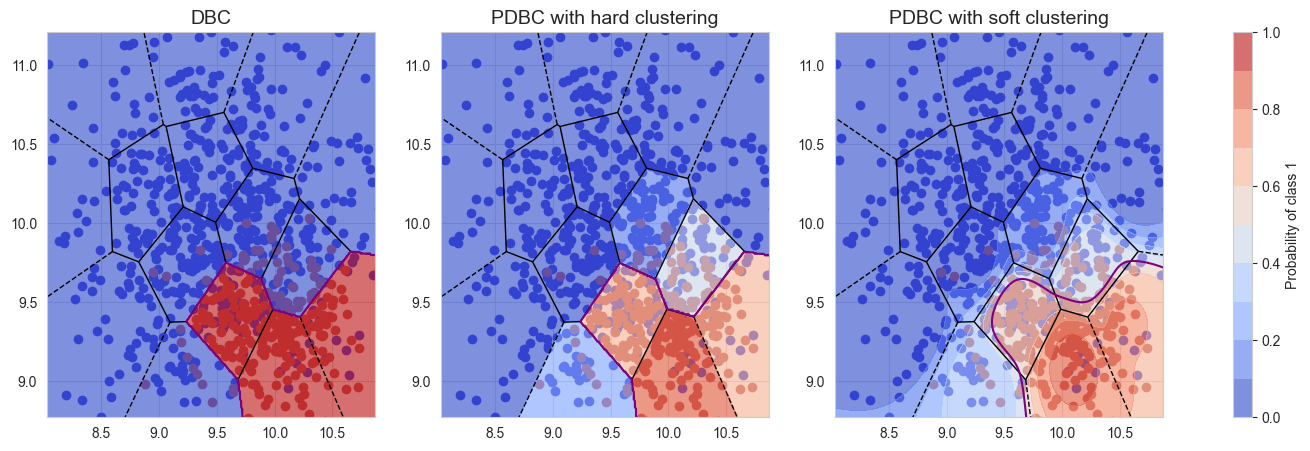

In [11]:
# Plot decision boundaries and probability contours for DBC, PDBC with hard clustering, and PDBC with soft clustering

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

vor = Voronoi(DBC_kmeans.cluster_centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[0])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[1])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[2])

Z1 = DBC_kmeans.predict_prob(np.c_[xx.ravel(), yy.ravel()])

Z0 = np.zeros_like(Z1)

max_indices = np.argmax(Z1, axis=1)

rows = np.arange(Z1.shape[0])

Z0[rows, max_indices] = 1.0

Z1 = Z1[:, 1].reshape(xx.shape)
Z0 = Z0[:, 1].reshape(xx.shape)

Z2 = DBC_fcm.predict_prob(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)

class0_indices = (y_train == 0)
class1_indices = (y_train == 1)
for i in range(3):
    ax[i].scatter(X_train[class0_indices, 0], X_train[class0_indices, 1], color='mediumblue')
    ax[i].scatter(X_train[class1_indices, 0], X_train[class1_indices, 1], color='firebrick')

contour0 = ax[0].contourf(xx, yy, Z0, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))
contour1 = ax[1].contourf(xx, yy, Z1, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))
contour2 = ax[2].contourf(xx, yy, Z2, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))

decision_boundary_prob = 0.5

boundary0 = ax[0].contour(xx, yy, Z0, levels=[decision_boundary_prob], colors='purple')
boundary1 = ax[1].contour(xx, yy, Z1, levels=[decision_boundary_prob], colors='purple')
boundary2 = ax[2].contour(xx, yy, Z2, levels=[decision_boundary_prob], colors='purple')

cbar = fig.colorbar(contour2, ax=ax, orientation='vertical')
cbar.set_label('Probability of class 1')

ax[0].set_title('DBC', fontsize=14)
ax[1].set_title('PDBC with hard clustering', fontsize=14)
ax[2].set_title('PDBC with soft clustering', fontsize=14)

/var/folders/jj/gtt8rdq925x6cg1h89ndvd8w0000gn/T/ipykernel_49752/2384348732.py:46: UserWarning: Adding colorbar to a different Figure <Figure size 1800x500 with 4 Axes> than <Figure size 1200x500 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(contour2, ax=ax, orientation='vertical')


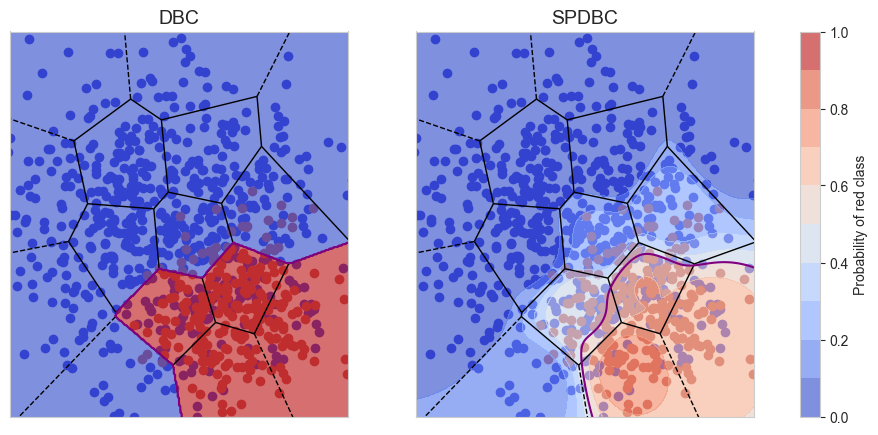

In [14]:
# Plot decision boundaries and probability contours for DBC, PDBC with hard clustering, and PDBC with soft clustering

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

vor = Voronoi(DBC_kmeans.cluster_centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[0])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[1])

Z1 = DBC_kmeans.predict_prob(np.c_[xx.ravel(), yy.ravel()])

Z0 = np.zeros_like(Z1)

max_indices = np.argmax(Z1, axis=1)

rows = np.arange(Z1.shape[0])

Z0[rows, max_indices] = 1.0

Z1 = Z1[:, 1].reshape(xx.shape)
Z0 = Z0[:, 1].reshape(xx.shape)

Z2 = DBC_fcm.predict_prob(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)

class0_indices = (y_train == 0)
class1_indices = (y_train == 1)
for i in range(2):
    ax[i].scatter(X_train[class0_indices, 0], X_train[class0_indices, 1], color='mediumblue')
    ax[i].scatter(X_train[class1_indices, 0], X_train[class1_indices, 1], color='firebrick')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

contour0 = ax[0].contourf(xx, yy, Z0, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))
contour1 = ax[1].contourf(xx, yy, Z2, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))


decision_boundary_prob = 0.5

boundary0 = ax[0].contour(xx, yy, Z0, levels=[decision_boundary_prob], colors='purple')
boundary1 = ax[1].contour(xx, yy, Z2, levels=[decision_boundary_prob], colors='purple')

cbar = fig.colorbar(contour2, ax=ax, orientation='vertical')
cbar.set_label('Probability of red class')

ax[0].set_title('DBC', fontsize=14)
ax[1].set_title('SPDBC', fontsize=14)

plt.savefig("DBC_SPDBC.pdf",dpi=300, bbox_inches="tight",transparent=True)


In [15]:
DMC_kmeans = KmeansDiscreteMinmaxClassifier(n_clusters=15, random_state=25)
DMC_kmeans.fit(X_train, y_train)
y_pred = DMC_kmeans.predict(X_train)
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

Class condition risk: 
[0.2016 0.152 ]

Confusion matrix: 
[[0.7984 0.2016]
 [0.152  0.848 ]]


Text(0.5, 1.0, 'PDMC with soft clustering')

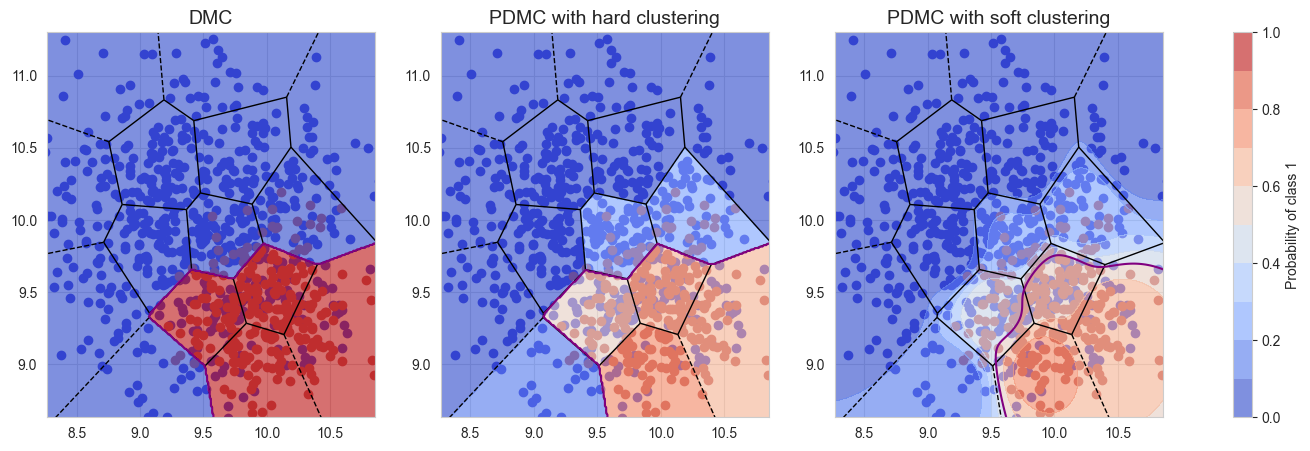

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

vor = Voronoi(DMC_kmeans.cluster_centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[0])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[1])
voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, ax=ax[2])

Z1 = DMC_kmeans.predict_prob(np.c_[xx.ravel(), yy.ravel()])

Z0 = np.zeros_like(Z1)

max_indices = np.argmax(Z1, axis=1)

rows = np.arange(Z1.shape[0])

Z0[rows, max_indices] = 1.0

Z1 = Z1[:, 1].reshape(xx.shape)
Z0 = Z0[:, 1].reshape(xx.shape)

Z2 = DBC_fcm.predict_prob(np.c_[xx.ravel(), yy.ravel()], prior_pred=DMC_kmeans.prior_star)
Z2 = Z2[:, 1].reshape(xx.shape)

class0_indices = (y_train == 0)
class1_indices = (y_train == 1)
for i in range(3):
    ax[i].scatter(X_train[class0_indices, 0], X_train[class0_indices, 1], color='mediumblue')
    ax[i].scatter(X_train[class1_indices, 0], X_train[class1_indices, 1], color='firebrick')

contour0 = ax[0].contourf(xx, yy, Z0, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))
contour1 = ax[1].contourf(xx, yy, Z1, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))
contour2 = ax[2].contourf(xx, yy, Z2, alpha=0.7, cmap='coolwarm', levels=np.linspace(0, 1, 11))

decision_boundary_prob = 0.5

boundary0 = ax[0].contour(xx, yy, Z0, levels=[decision_boundary_prob], colors='purple')
boundary1 = ax[1].contour(xx, yy, Z1, levels=[decision_boundary_prob], colors='purple')
boundary2 = ax[2].contour(xx, yy, Z2, levels=[decision_boundary_prob], colors='purple')

cbar = fig.colorbar(contour2, ax=ax, orientation='vertical')
cbar.set_label('Probability of class 1')

ax[0].set_title('DMC', fontsize=14)
ax[1].set_title('PDMC with hard clustering', fontsize=14)
ax[2].set_title('PDMC with soft clustering', fontsize=14)

In [ ]:
DBC_DT = DecisionTreeDiscreteBayesianClassifier(max_depth=10)
DBC_DT.fit(X_train, y_train)
y_pred = DBC_DT.predict(X_train, prior_pred=DBC_DT.prior)
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')

In [ ]:
accuracy_score(y_train, y_pred)

In [ ]:
DMC_DT = DecisionTreeDiscreteMinimaxClassifier(max_depth=10)
DMC_DT.fit(X_train, y_train)
y_pred = DMC_DT.predict(X_train)
conditional_risk = compute_conditional_risk(y_train, y_pred)
print(f'Class condition risk: \n{conditional_risk[0]}')
print(f'\nConfusion matrix: \n{conditional_risk[1]}')